# Matplotlib Advanced Costomisation

In [2]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Scientist Data
df_DS = df[df['job_title_short'] == 'Data Scientist']

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Top 5 Skills for Data Scientists per Month

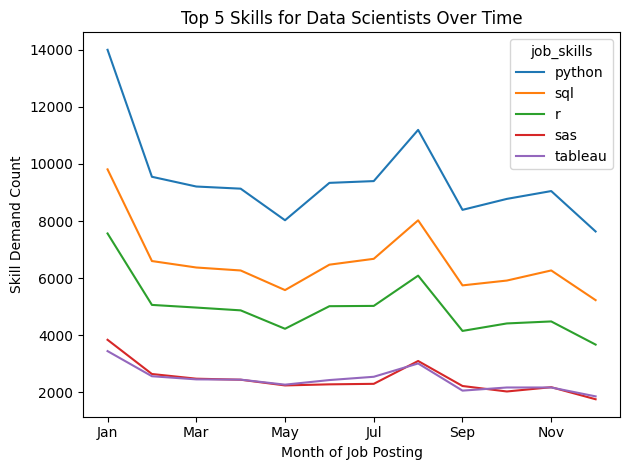

In [6]:
# Step 1: Filter dataset to include only "Data Scientist" job postings
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

# Step 2: Extract the month number from the job posting date
df_DS['job_posted_month_num'] = df_DS['job_posted_date'].dt.month

# Step 3: Expand the 'job_skills' column to have one skill per row
df_DS_explode = df_DS.explode('job_skills')

# Step 4: Create a pivot table to count the occurrences of each skill per month
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_num', 
                                         columns='job_skills', 
                                         aggfunc='size', 
                                         fill_value=0)

# Step 5: Reset index to bring month numbers into a column
df_DS_pivot = df_DS_pivot.reset_index()

# Step 6: Convert numeric month to short month name ('Jan', 'Feb', etc.)
df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Step 7: Set the index back to month names
df_DS_pivot = df_DS_pivot.set_index('job_posted_month')

# Step 8: Drop the numerical month column (no longer needed)
df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_num')

# Step 9: Compute the total occurrences of each skill across all months
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()

# Step 10: Sort skills by total occurrences in descending order
df_DS_final = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]

# Step 11: Remove the 'Total' row as it's no longer needed
df_DS_final = df_DS_final.drop('Total')

# Step 12: Plot the top 5 most in-demand skills over the months
df_DS_final.iloc[:, :5].plot(kind='line')

# Step 13: Customize the plot for better readability
plt.title('Top 5 Skills for Data Scientists Over Time')  # Set plot title
plt.ylabel('Skill Demand Count')  # Label the y-axis
plt.xlabel('Month of Job Posting')  # Label the x-axis
plt.tight_layout()  # Adjust layout for clarity

# Step 14: Display the line plot
plt.show()


## ===================================================
## Visualizing the Top 5 Skills for Data Analyst Jobs
## ===================================================

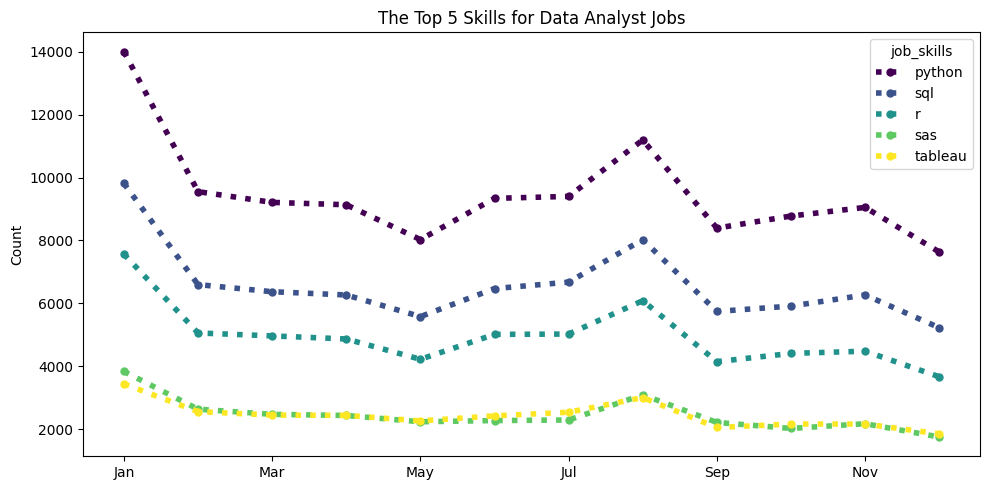

In [8]:
# Plot the first 5 columns of the DataFrame
df_DS_final.iloc[:, :5].plot(
    kind='line',        # Line plot
    linewidth=4,        # Set line width
    linestyle=':',      # Dashed line style
    colormap='viridis', # Use the 'viridis' colormap for better visualization
    marker='o',         # Circular markers for data points
    markersize=5,       # Size of the markers
    figsize=(10, 5)     # Set figure size
)

# Set plot title and labels
plt.title('The Top 5 Skills for Data Analyst Jobs') # Title of the chart
plt.xlabel('')  # No label for x-axis
plt.ylabel('Count')  # Label for y-axis indicating skill frequency

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


## Top 20 Most Common Skills for Data Analysts

In [11]:
# Filter Data Analyst jobs and create a copy to avoid warnings
df = df[df['job_title_short'] == 'Data Analyst'].copy()

# Drop NaN values in job_skills before exploding
df_explode = df.dropna(subset=['job_skills']).explode('job_skills')

# Group by job_skills to calculate count and median salary
skill_df = df_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Sort by skill_count and keep the top 10
skill_df = skill_df.sort_values(by='skill_count', ascending=False).head(20)

# Display the result
skill_df

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


## Salary vs. Count of Job Postings for Top 20 Skills

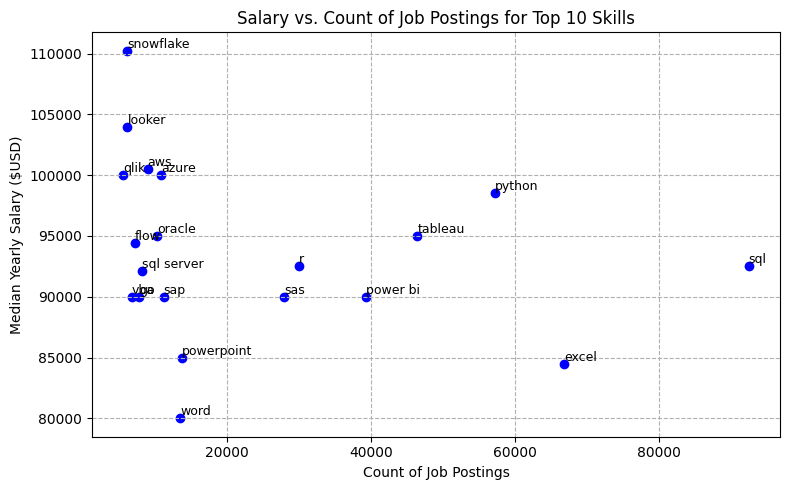

In [13]:
# Drop NaN values in median_salary if they exist
skill_df = skill_df.dropna(subset=['median_salary'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 5))  # Set figure size
ax.scatter(skill_df['skill_count'], skill_df['median_salary'], color='blue')

# Add labels for each point
for i, txt in enumerate(skill_df.index):
    ax.text(skill_df['skill_count'].iloc[i], skill_df['median_salary'].iloc[i], txt, 
            fontsize=9, va='bottom',color='black')

# Add labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')

# Add grid for better readability
plt.grid(True, linestyle="--")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Salary vs. Demand: Top 20 Data Analyst Skills in the U.S. Job Market

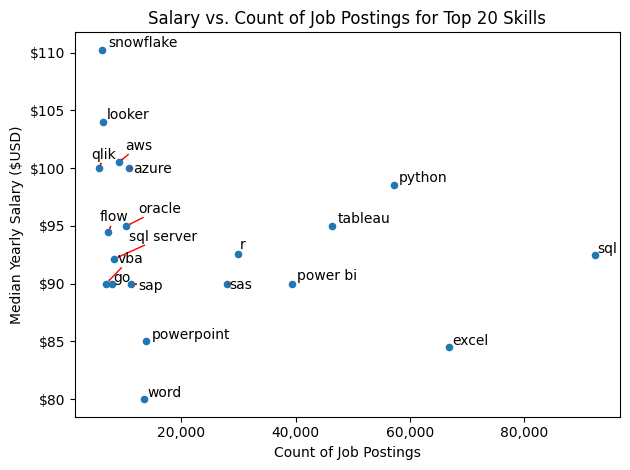

In [ ]:
from adjustText import adjust_text

# Drop NaN values in median_salary if they exist
skill_df = skill_df.dropna(subset=['median_salary'])

# Create scatter plot
skill_df.plot(kind='scatter', x='skill_count', y='median_salary')

# Add labels for each point
text = []
for i, txt in enumerate(skill_df.index):
    text.append(plt.text(skill_df['skill_count'].iloc[i],
                         skill_df['median_salary'].iloc[i],
                         txt))

# Fix here: arrowprops, not arropropts
adjust_text(text, arrowprops=dict(arrowstyle='->', color='r', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 20 Skills')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
